# Step 1:  Import libraries

In [1]:
!pip install pandas matplotlib scikit-learn seaborn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


# Step 2: Explore the dataset

In [3]:
raw_df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
raw_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
raw_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:

raw_df.shape

(6362620, 11)

### check missing values

In [8]:

print(raw_df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [9]:
# Check for null values
if raw_df.isnull().values.any():
    print("Dataset contains null values. Dropping rows with null values.")
raw_df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


 dropping any rows where the value of the target column 'isFraud' in empty.

In [10]:
raw_df.dropna(subset=['isFraud'], inplace=True)

In [11]:
print(raw_df.duplicated().sum())
#df.drop_duplicates(inplace=True)

0


In [12]:
print("*******************************************************\n")
print(raw_df.head())
print("*******************************************************\n")
print(raw_df.tail())
print("*******************************************************\n")
print(raw_df.describe())
print("*--******************************************************\n")
print(raw_df.info())
print("*******************************************************\n")

*******************************************************

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
************************************************

###   &nbsp;  &nbsp;  &nbsp;  removing unnecessary columns

In [13]:

df = raw_df.drop([ 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


 assign the 7 independent variables step, type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest to X.

The dependent variable that we need to predict — “isFraud” will be assigned to y.



In [14]:
# Assuming the problem is to predict whether a transaction is fraudulent or not
# Dependent feature: isFraud
# Independent features: type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

X = df[['step','type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']


In [15]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [16]:
print(X.type)


0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object


In [17]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

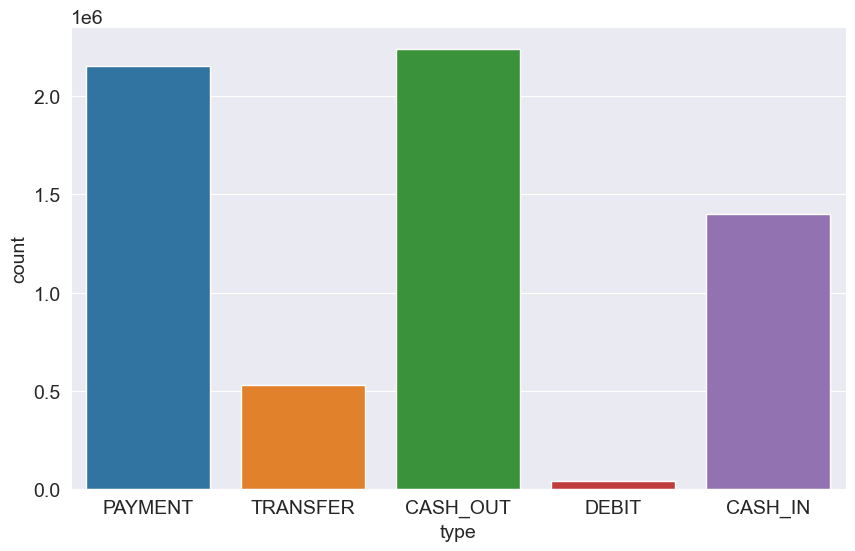

In [18]:
sns.countplot(x='type',data=df)

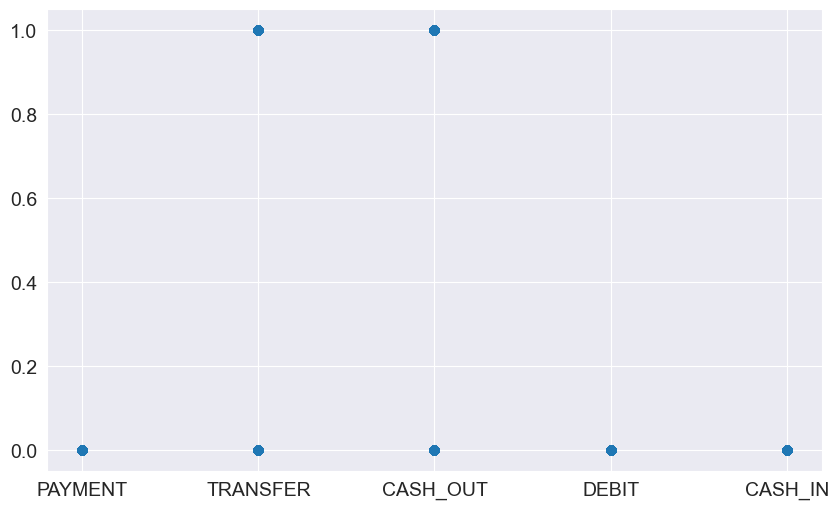

In [19]:
plt.scatter(x=raw_df['type'], y=raw_df['isFraud'])


<AxesSubplot:>

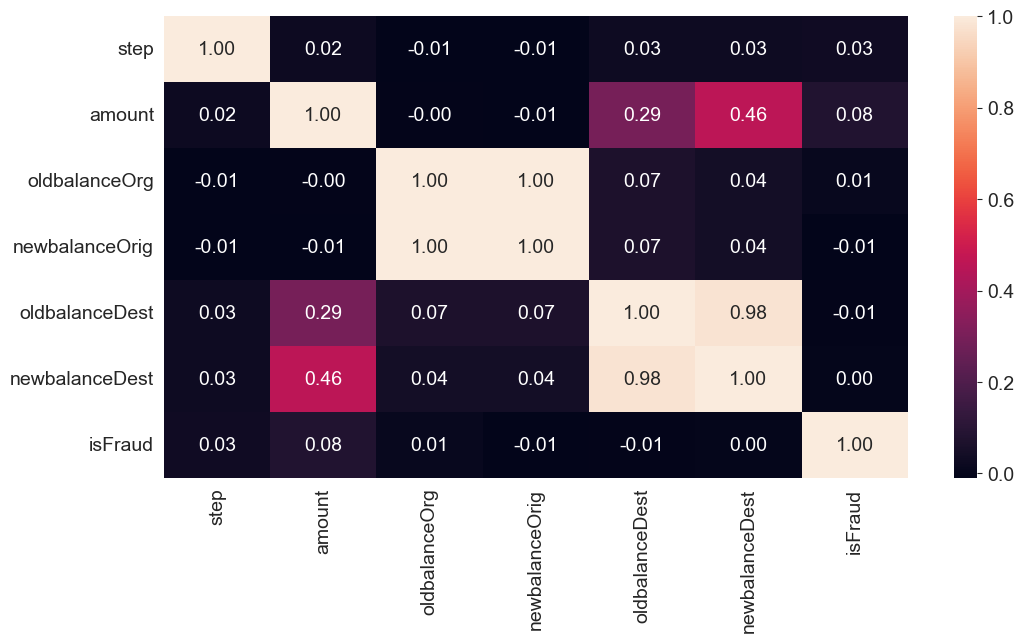

In [20]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

### converting categorical variables into numerical values


In [21]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the categorical column to numerical values
df['encoded_type'] = label_encoder.fit_transform(df['type'])

# Convert the numerical values to float
df['encoded_type'] = df['encoded_type'].astype(float)



In [22]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,encoded_type
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,3.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,3.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,4.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,3.0


In [23]:
df = df.drop('type', axis=1)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,encoded_type
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,3.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,3.0
2,1,181.00,181.0,0.00,0.0,0.0,1,4.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,1.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,3.0


# step 3: splitting the data into training and testing sets:

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4771965, 7)
X_test shape: (1590655, 7)
y_train shape: (4771965,)
y_test shape: (1590655,)


# -----------------------------------------------------------------------------------------------------

## Training and Visualizing Decision Trees


### create an optimal decision tree using the training data.

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)


In [27]:
import pandas as pd

# Perform one-hot encoding on the categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Fit the model using the encoded data
model.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=42)

In [28]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train_encoded,y_train)

DecisionTreeClassifier(max_depth=5)

## visualizing the tree

[Text(0.6964285714285714, 0.9166666666666666, 'x[0] <= 718.5\ngini = 0.003\nsamples = 4771965\nvalue = [4765797, 6168]'),
 Text(0.625, 0.75, 'x[1] <= 2871765.375\ngini = 0.002\nsamples = 4771737\nvalue = [4765797, 5940]'),
 Text(0.39285714285714285, 0.5833333333333334, 'x[1] <= 612229.406\ngini = 0.002\nsamples = 4753474\nvalue = [4748447, 5027]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[1] <= 0.01\ngini = 0.001\nsamples = 4589027\nvalue = [4585659, 3368]'),
 Text(0.07142857142857142, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.21428571428571427, 0.25, 'x[10] <= 0.5\ngini = 0.001\nsamples = 4589015\nvalue = [4585659, 3356]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.001\nsamples = 4355671\nvalue = [4353987, 1684]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.014\nsamples = 233344\nvalue = [231672, 1672]'),
 Text(0.6428571428571429, 0.4166666666666667, 'x[2] <= 612178.438\ngini = 0.02\nsamples = 164447\nvalue = [162788, 1659]'),
 

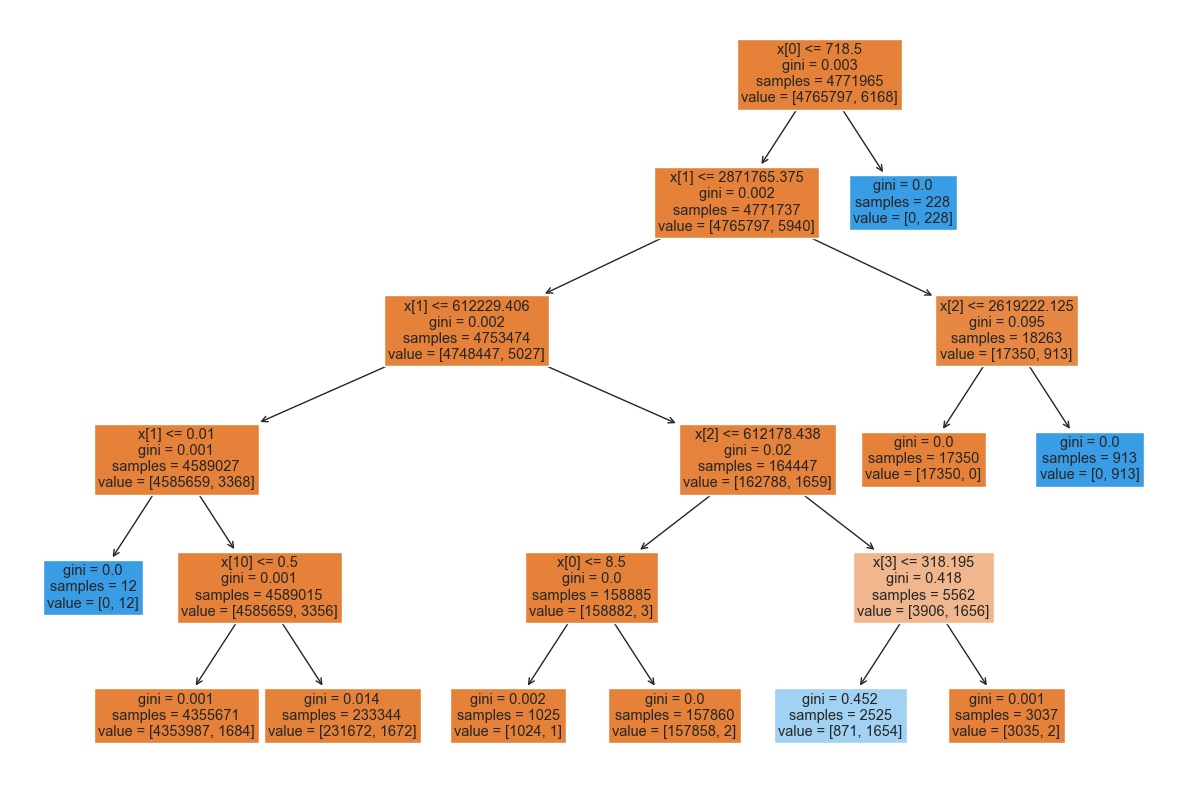

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [30]:

# Perform one-hot encoding on the categorical variables in testing data
X_test_encoded = pd.get_dummies(X_test)

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test_encoded )


In [32]:

# Compute accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9991047713049027


# -----------------------------------------------------------------------------------------------------

# Testing the model

In [33]:
import pickle


In [34]:
pickle.dump(model, open('model.pkl', 'wb'))

In [35]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test_encoded)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:


# Load the trained decision tree model from a file
with open('model.pkl', 'rb') as f:
    dtc = pickle.load(f)

# Define the input features and their order
#features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
features = [
'step','type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'
]

# Get the user inputs
user_inputs = []
for feature in features:
    user_input = input(f"Enter {feature}: ")
    #user_inputs.append(float(user_input))
    user_inputs.append(X_test_encoded)

# Make a prediction using the loaded model and user inputs
#prediction = dtc.predict([user_inputs])[0]
prediction = dtc.predict([X_test_encoded])[5]
print(prediction)

# Print the prediction
if prediction == 1:
    print("Fraudulent transaction")
else:
    print("Legitimate transaction")


In [ ]:

#'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'
